In [28]:
import matplotlib.pyplot as plt
import numpy as np

from pyfusion.algs import eed
from pyfusion.data import load
from pyfusion.structs import math
from pyfusion.structs.validation_utils import FloatArr
from pyfusion.utils import projection

In [29]:
SLICE = 70

In [30]:
MAX_ITER = 500
STEP_SIZE = 0.01

In [31]:
FSL = load.load_fsl("../data/example_mri", SLICE)

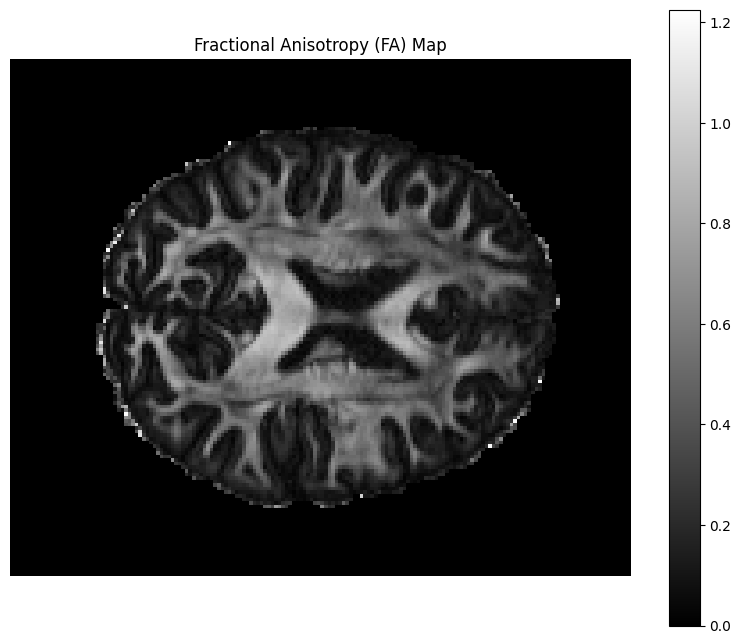

In [32]:
# type: ignore
# Plotting the FA map
plt.figure(figsize=(10, 8))
plt.imshow(FSL.FA, cmap="gray")
plt.title("Fractional Anisotropy (FA) Map")
plt.axis("off")
plt.colorbar()
plt.show()

In [33]:
# add random noise to the FA map
FA_noisy = FSL.FA + 0.3 * FSL.FA.std() * np.random.randn(*FSL.FA.shape)

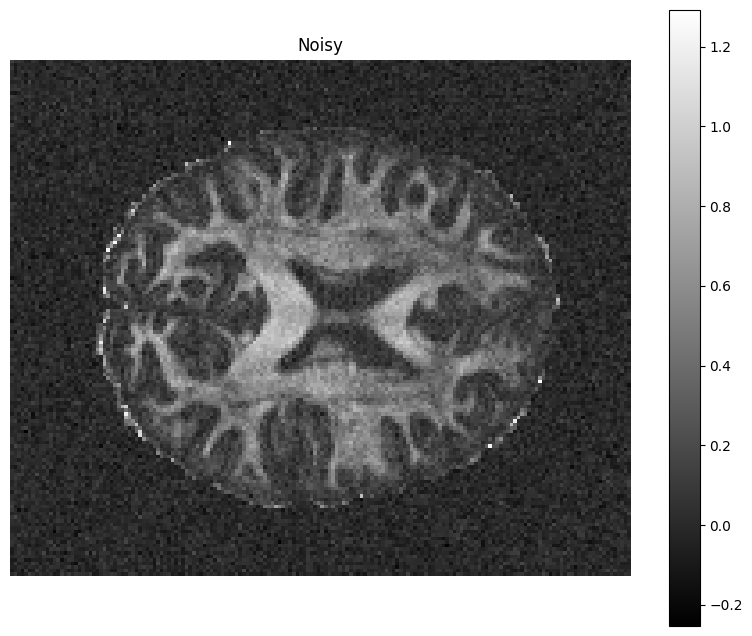

In [34]:
# type: ignore
# Plotting the noisy FA map
plt.figure(figsize=(10, 8))
plt.imshow(FA_noisy, cmap="gray")
plt.title("Noisy")
plt.axis("off")
plt.colorbar()
plt.show()

In [35]:
eigen_1 = math.Eigen3D(eigvec=FSL.V1, eigval=FSL.L1)
eigen_2 = math.Eigen3D(eigvec=FSL.V2, eigval=FSL.L2)
eigen_3 = math.Eigen3D(eigvec=FSL.V3, eigval=FSL.L3)

eigen_decomp = math.EigenDecomp3D(
    eigen_1=eigen_1,
    eigen_2=eigen_2,
    eigen_3=eigen_3,
)

In [36]:
def heat_conduction(x: FloatArr) -> FloatArr:
    """
    Heat conduction function for the diffusion tensor.
    """
    return 1 / (1 + x**2)

In [37]:
tensor_field = projection.calculate_eigen3d(eigen_decomp)

decomposed_tensor = projection.calculate_decomposition(tensor_field)

heated_tensor = eed.apply_heat_conduction(decomposed_tensor, heat_conduction)

In [38]:
img = math.Image(data=FA_noisy.copy())

for _ in range(MAX_ITER):
    img = eed.step(img, heated_tensor, step_size=STEP_SIZE)

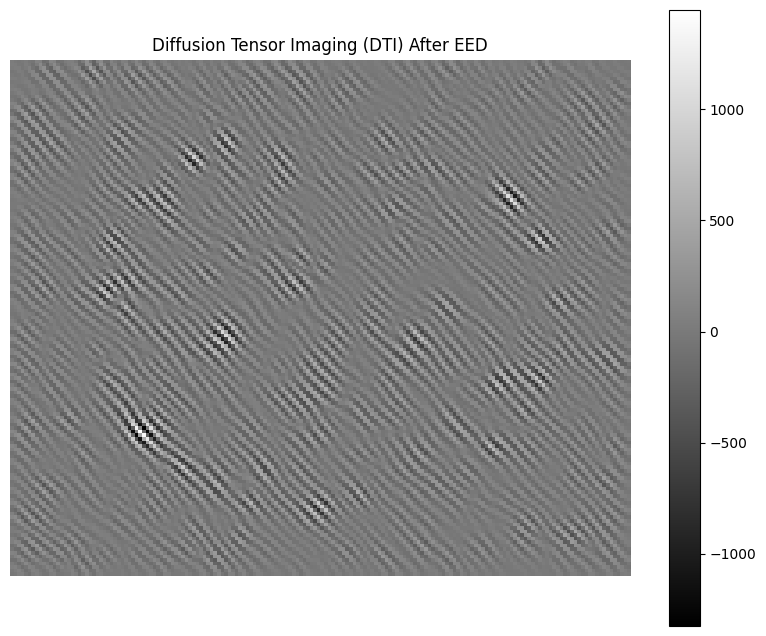

In [39]:
# type: ignore
plt.figure(figsize=(10, 8))
plt.imshow(img.data, cmap="gray")
plt.title("Diffusion Tensor Imaging (DTI) After EED")
plt.axis("off")
plt.colorbar()
plt.show()

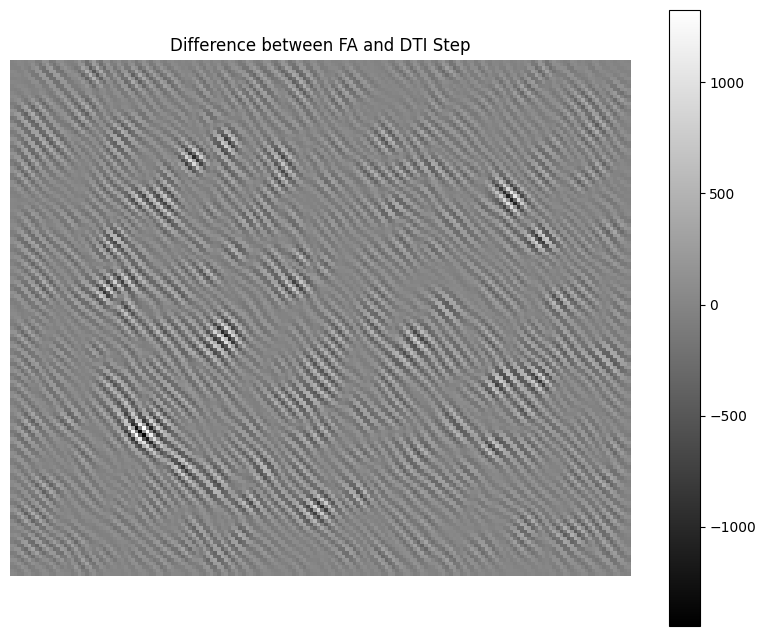

In [40]:
# type: ignore
difference = FSL.FA - img.data
plt.figure(figsize=(10, 8))
plt.imshow(difference, cmap="gray")
plt.title("Difference between FA and DTI Step")
plt.axis("off")
plt.colorbar()
plt.show()